In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate

## Read and Understand Data

In [ ]:
# Load data
df = pd.read_csv(r"C:\MyData\Workspace\mini_capstone\data\insurance_cleaned.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Basic dataset information
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nColumn names and types:")
print(df.dtypes)

Number of rows: 1338
Number of columns: 7

Column names and types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
missing_df

,Missing Count,Percentage
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [5]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates / len(df)) * 100:.2f}%")
    print("\nSample duplicate rows:")
    display(df[df.duplicated(keep=False)].head(10))
else:
    print("No duplicate rows found")

Number of duplicate rows: 1
Percentage of duplicates: 0.07%

Sample duplicate rows:


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
# Descriptive statistics for numerical features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Descriptive statistics for categorical features
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
# Distribution of categorical features
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    value_counts = df[col].value_counts()
    value_percentage = (df[col].value_counts(normalize=True) * 100).round(2)
    dist_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_percentage
    })
    display(dist_df)

,Count,Percentage
sex,,
male,676,50.52
female,662,49.48


,Count,Percentage
smoker,,
no,1064,79.52
yes,274,20.48


,Count,Percentage
region,,
southeast,364,27.20
southwest,325,24.29
northwest,325,24.29
northeast,324,24.22


## Exploratory Data Analysis

### Univariate Analysis

In [9]:
def dist_box(df):
    # function plots a combined graph for univariate analysis of continous variable 
    #to check spread, central tendency , dispersion and outliers  
    Name = df.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.25, .75)}, figsize=(8, 5))
    mean = df.mean()
    median = df.median()
    mode = df.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight='bold')
    sns.boxplot(x=df, showmeans=True, orient='h', color="skyblue", ax=ax_box)
    ax_box.set(xlabel='')
    sns.histplot(df, kde=False, color='lightcoral', ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-', linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-', linewidth=2)
    plt.legend({'Mean': mean, 'Median': median, 'Mode': mode})


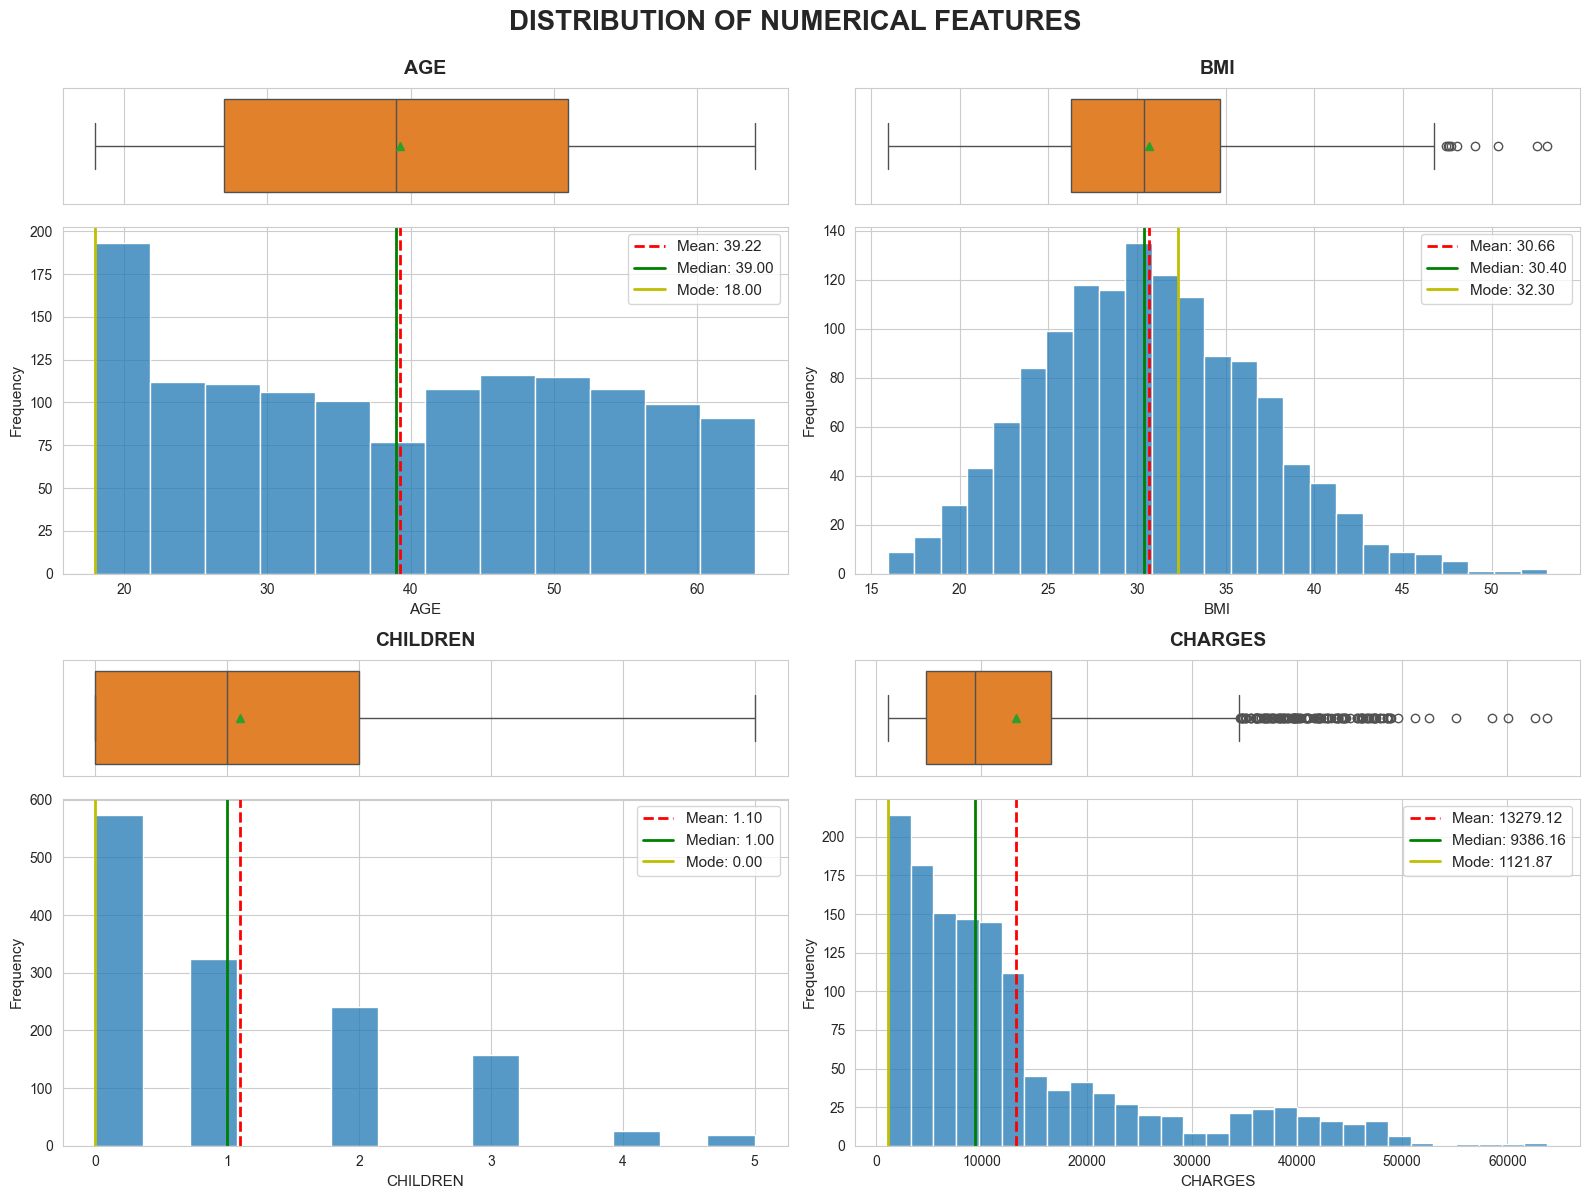

In [29]:
#select all quantitative columns for checking the spread
list_col = df.select_dtypes([np.number]).columns

# Create a figure with 4 subplots (2x2 grid)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DISTRIBUTION OF NUMERICAL FEATURES', fontsize=20, fontweight='bold', y=0.995)
axes = axes.flatten()

for i in range(len(list_col)):
    col_data = df[list_col[i]]
    Name = col_data.name.upper()
    
    # Create a nested subplot structure for each feature
    ax = axes[i]
    ax.axis('off')  # Hide the main subplot axis
    
    # Create sub-axes within each subplot
    gs = ax.get_subplotspec().subgridspec(2, 1, height_ratios=[0.25, 0.75], hspace=0.1)
    ax_box = fig.add_subplot(gs[0])
    ax_dis = fig.add_subplot(gs[1])
    
    # Calculate statistics
    mean = col_data.mean()
    median = col_data.median()
    mode = col_data.mode().tolist()[0]
    
    # Set title for this feature
    ax_box.set_title(Name, fontsize=14, fontweight='bold', pad=10)
    
    # Box plot
    sns.boxplot(x=col_data, showmeans=True, orient='h', color="C1", ax=ax_box)
    ax_box.set(xlabel='')
    ax_box.tick_params(labelbottom=False)
    
    # Histogram
    sns.histplot(col_data, kde=False, ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
    ax_dis.axvline(median, color='g', linestyle='-', linewidth=2, label=f'Median: {median:.2f}')
    ax_dis.axvline(mode, color='y', linestyle='-', linewidth=2, label=f'Mode: {mode:.2f}')
    ax_dis.legend(loc='best', fontsize=11)
    ax_dis.set_xlabel(Name, fontsize=11)
    ax_dis.set_ylabel('Frequency', fontsize=11)

plt.tight_layout()
plt.show()

Observations

- Age of primary beneficary lies approximately between 20 - 65 . Average Age is aprrox. 40. Majority of customer are in range 18- 20's.
- Bmi is normally distrubuted and Average BMI of beneficiary is 30.This BMI is outside the normal range of BMI. There are lot of outliers at upper end
- Most of the beneficary have no childrens.
- Charges distrubution is unimodal and is right skewed. Average cost incured to the insurance is appro. 130000 and highest charge is 63770.There are lot of outliers at upper end

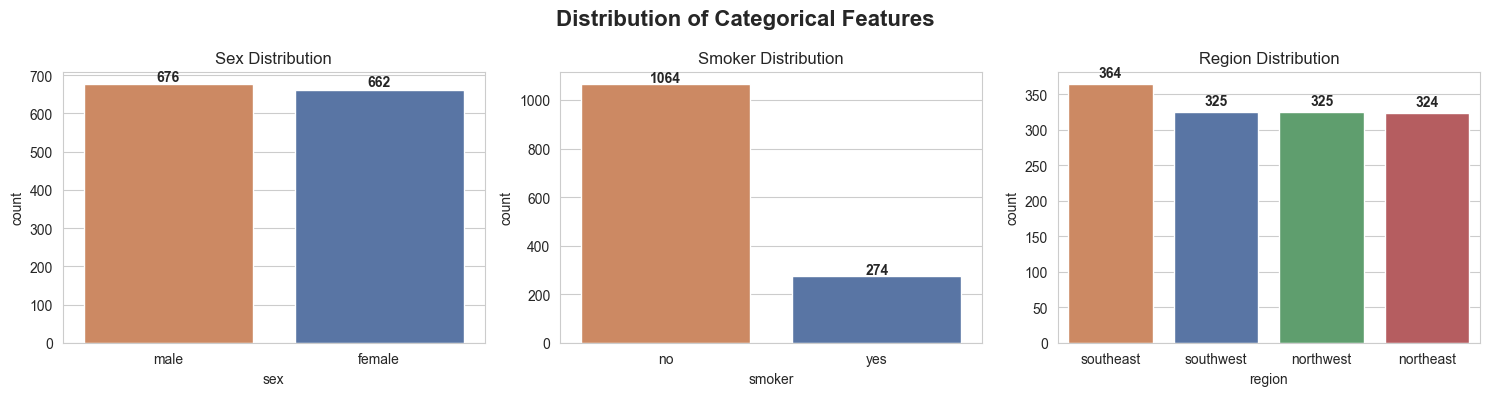

In [11]:
# Bar charts for categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold')

sex_counts = df['sex'].value_counts()
sns.countplot(x='sex', data=df, ax=axes[0], palette='deep', hue='sex', order=sex_counts.index)
axes[0].set_title('Sex Distribution')
for i, v in enumerate(sex_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')
    
smoker_counts = df['smoker'].value_counts()
sns.countplot(x='smoker', data=df, ax=axes[1], palette='deep', hue='smoker', order=smoker_counts.index)
axes[1].set_title('Smoker Distribution')
for i, v in enumerate(smoker_counts.values):
    axes[1].text(i, v + 10, str(v), ha='center', fontweight='bold')

region_counts = df['region'].value_counts()
sns.countplot(x='region', data=df, ax=axes[2], palette='deep', hue='region', order=region_counts.index)
axes[2].set_title('Region Distribution')
for i, v in enumerate(region_counts.values):
    axes[2].text(i, v + 10, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

### Bivariate Analysis

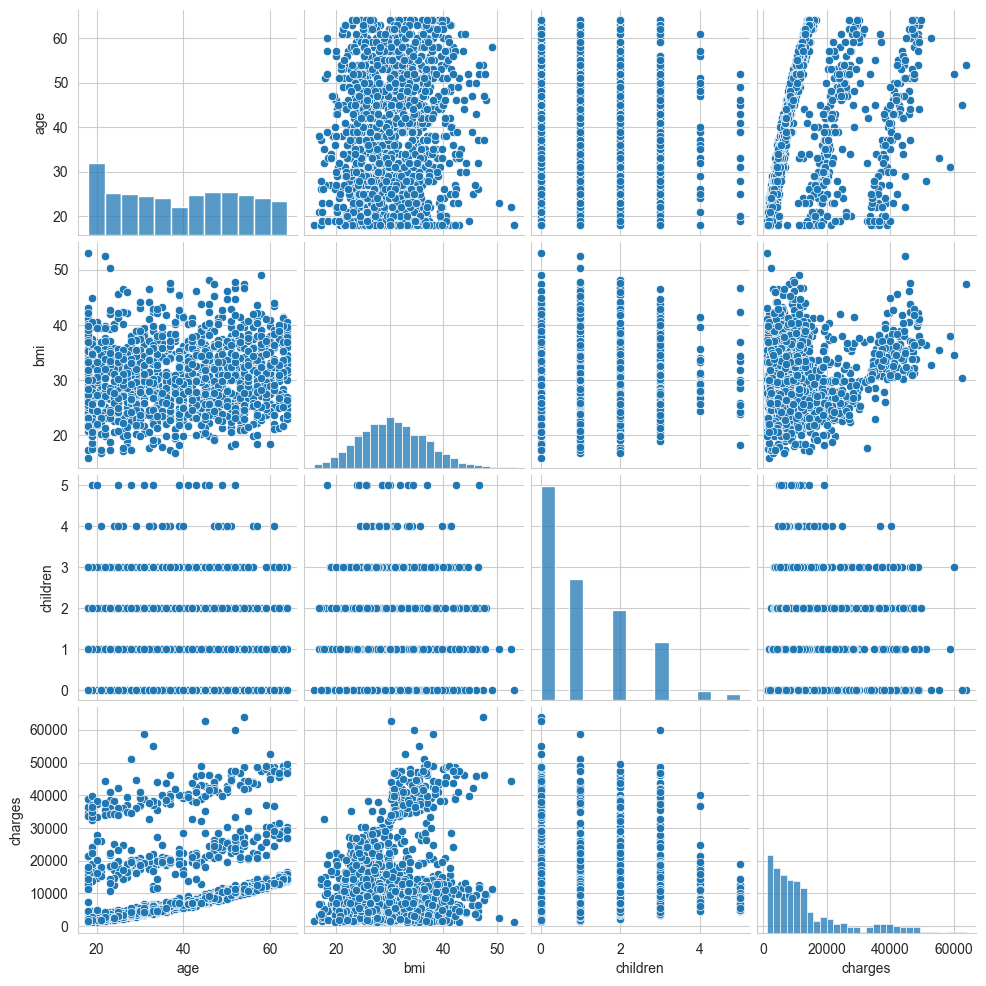

In [12]:
# Pairplot
sns.pairplot(df)
plt.show()

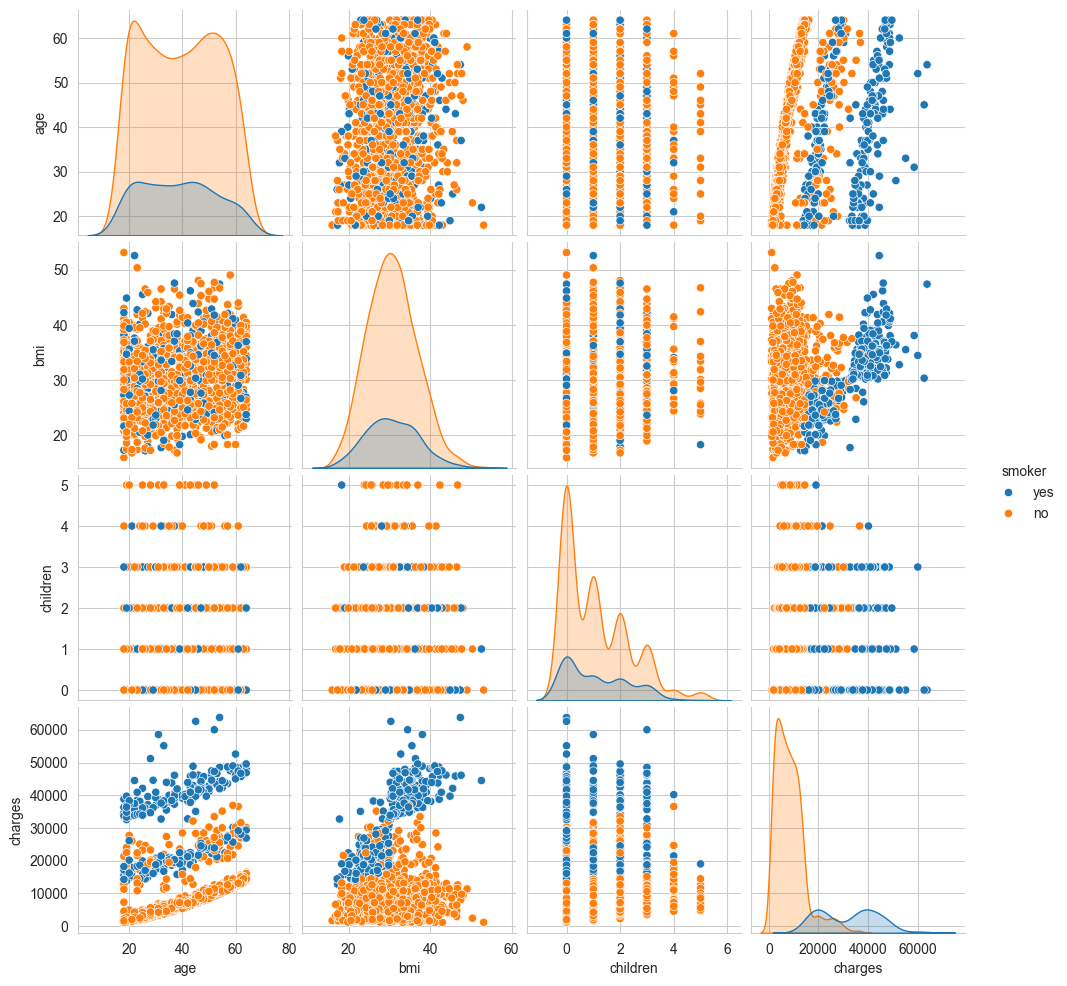

In [13]:
# Pairplot with hue based on 'smoker' status
sns.pairplot(df, hue='smoker')
plt.show()

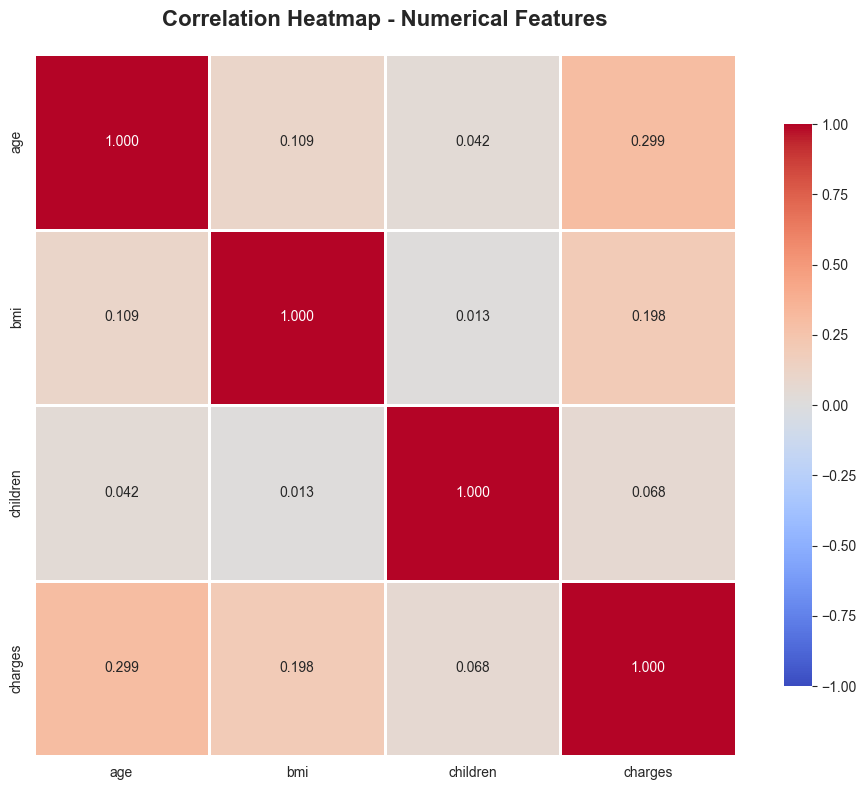


Correlation with Target (Charges):
----------------------------------------
age         : +0.299
bmi         : +0.198
children    : +0.068


In [14]:
# Calculate correlation matrix
numerical_cols = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap - Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation with Target (Charges):")
print("-" * 40)
correlations_with_charges = correlation_matrix['charges'].sort_values(ascending=False)
for feature, corr in correlations_with_charges.items():
    if feature != 'charges':
        print(f"{feature:12s}: {corr:+.3f}")

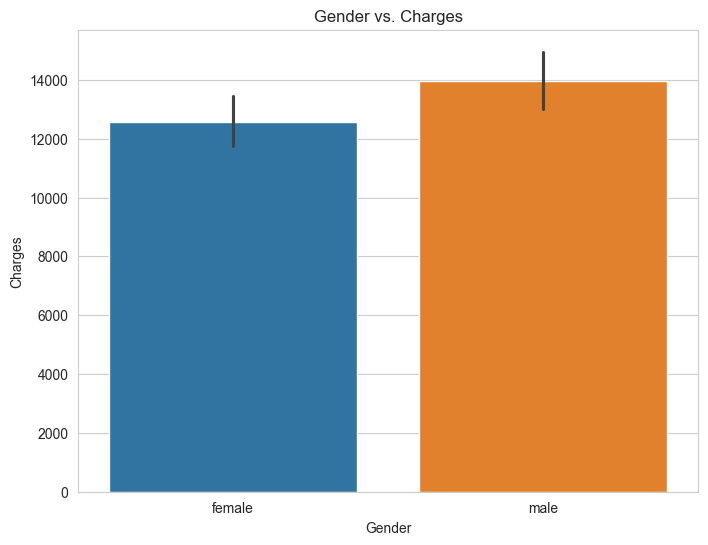

In [15]:
# Visualization : Grouped bar plot of gender vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='sex', y='charges', hue='sex')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Gender vs. Charges')
plt.show()

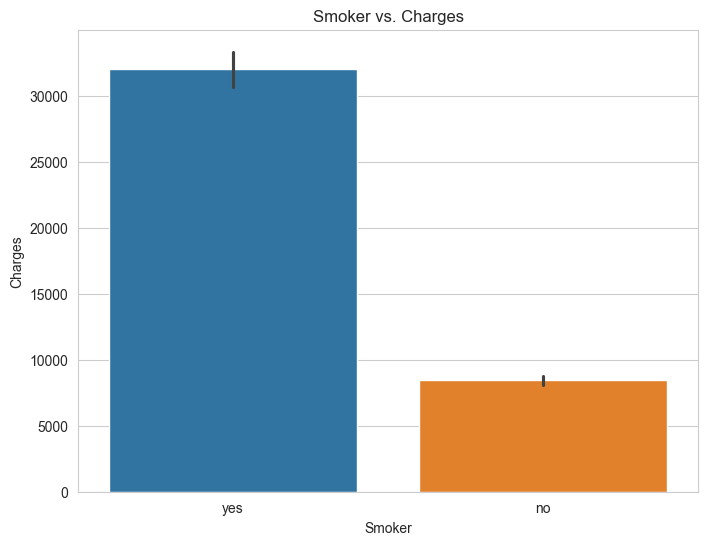

In [16]:
# Visualization : Grouped bar plot of smoker vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='smoker', y='charges', hue='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs. Charges')
plt.show()

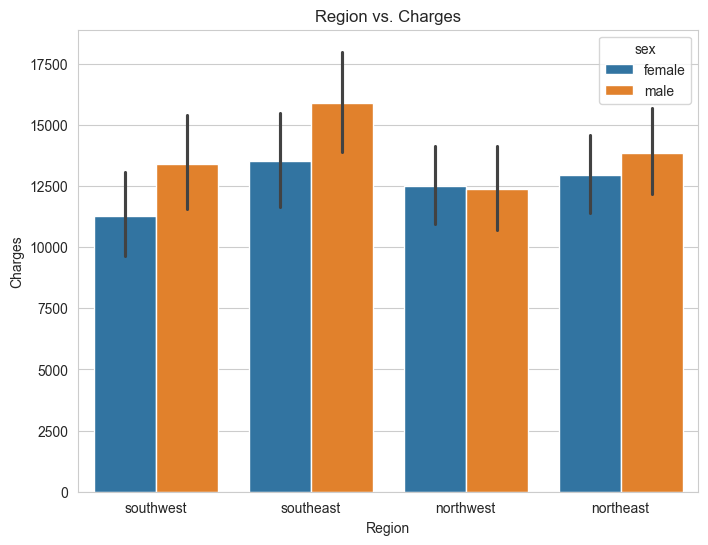

In [17]:
# Visualization : Stacked bar plot of region vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

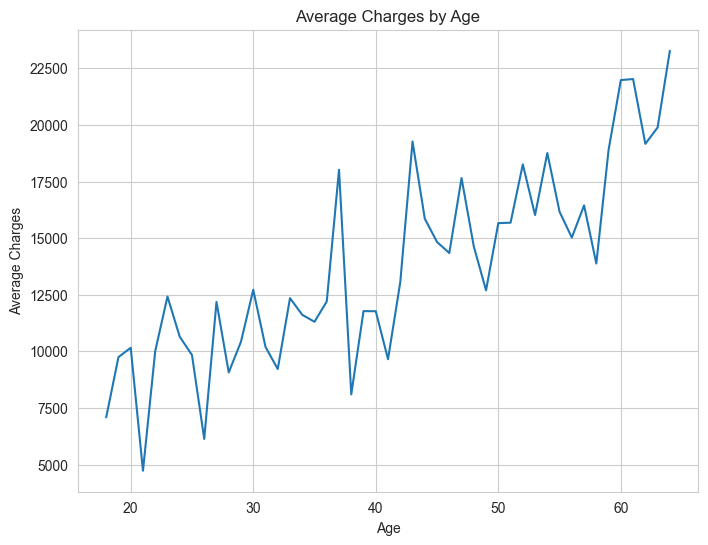

In [18]:
# Visualization : Line plot showing the average charges by age
avg_charges_by_age = df.groupby('age')['charges'].mean()
plt.figure(figsize=(8, 6))
plt.plot(avg_charges_by_age.index, avg_charges_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age')
plt.show()

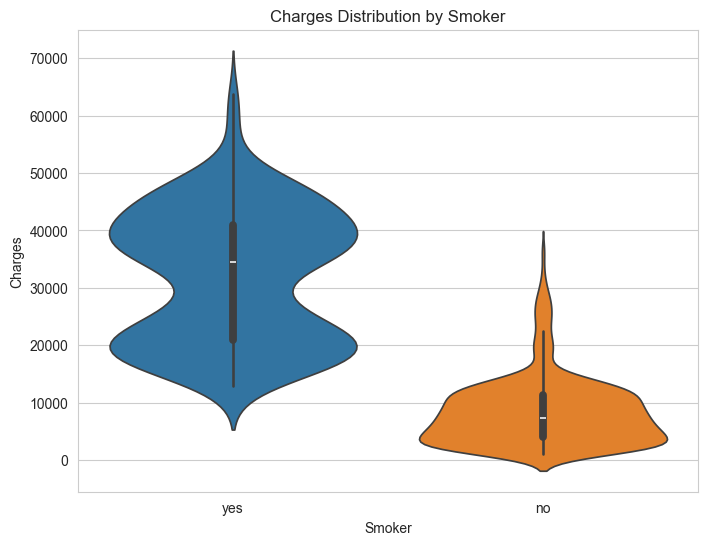

In [19]:
# Visualization : Violin plot of charges grouped by smoker vs. non-smoker
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='smoker', y='charges', hue='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show()

## Data Cleaning and Preprocessing

In [20]:
# Remove duplicates
print(f"Original dataset size: {len(df)} rows")
df = df.drop_duplicates()
print(f"Cleaned dataset size: {len(df)} rows")

Original dataset size: 1338 rows
Cleaned dataset size: 1337 rows


In [21]:
#df.to_csv("insurance_cleaned.csv", index=False)

**Just prove how data preprocessing, in real case use Pipeline to avoid data leakage**

In [22]:
# Column groups & preprocessors
num_cols = ["age", "bmi", "children"]
cat_cols_clf = ["sex", "region"]
cat_cols_reg = ["sex", "smoker", "region"]

y_clf = df["smoker"].map({"yes": 1, "no": 0})    # Classification: predict smoker status
y_reg = df["charges"]                            # Regression: predict charges

# ---------- Classification ----------
# One-hot encode columns for classification
X_cat_clf = pd.get_dummies(df[cat_cols_clf], drop_first=True, dtype=int)

# Scale numerical features for classification
scaler_clf = StandardScaler()
X_num_clf_scaled = pd.DataFrame(
    scaler_clf.fit_transform(df[num_cols]),
    columns=num_cols,
    index=df.index
)

# Concatenate classification features
df_clf = pd.concat([X_num_clf_scaled, X_cat_clf, y_clf], axis=1)

# ---------- Regression ----------
# One-hot encode columns for regression
X_cat_reg = pd.get_dummies(df[cat_cols_reg], dtype=int)

# Scale numerical features for regression
scaler_reg = StandardScaler()
X_num_reg_scaled = pd.DataFrame(
    scaler_reg.fit_transform(df[num_cols]),
    columns=num_cols,
    index=df.index
)

# Concatenate regression features
df_reg = pd.concat([X_num_reg_scaled, X_cat_reg, y_reg], axis=1)

# Display cleaned example datasets
display(df_clf.head())
display(df_reg.head())

# Save cleaned and preprocessed datasets
# df_clf.to_csv("example_cleaned_classification.csv", index=False)
# df_reg.to_csv("example_cleaned_regression.csv", index=False)

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest,smoker
0,-1.440418,-0.453160,-0.909234,0,0,0,1,1
1,-1.511647,0.509422,-0.079442,1,0,1,0,0
2,-0.799350,0.383155,1.580143,1,0,1,0,0
3,-0.443201,-1.305052,-0.909234,1,1,0,0,0
4,-0.514431,-0.292456,-0.909234,1,1,0,0,0


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.440418,-0.453160,-0.909234,1,0,0,1,0,0,0,1,16884.92400
1,-1.511647,0.509422,-0.079442,0,1,1,0,0,0,1,0,1725.55230
2,-0.799350,0.383155,1.580143,0,1,1,0,0,0,1,0,4449.46200
3,-0.443201,-1.305052,-0.909234,0,1,1,0,0,1,0,0,21984.47061
4,-0.514431,-0.292456,-0.909234,0,1,1,0,0,1,0,0,3866.85520


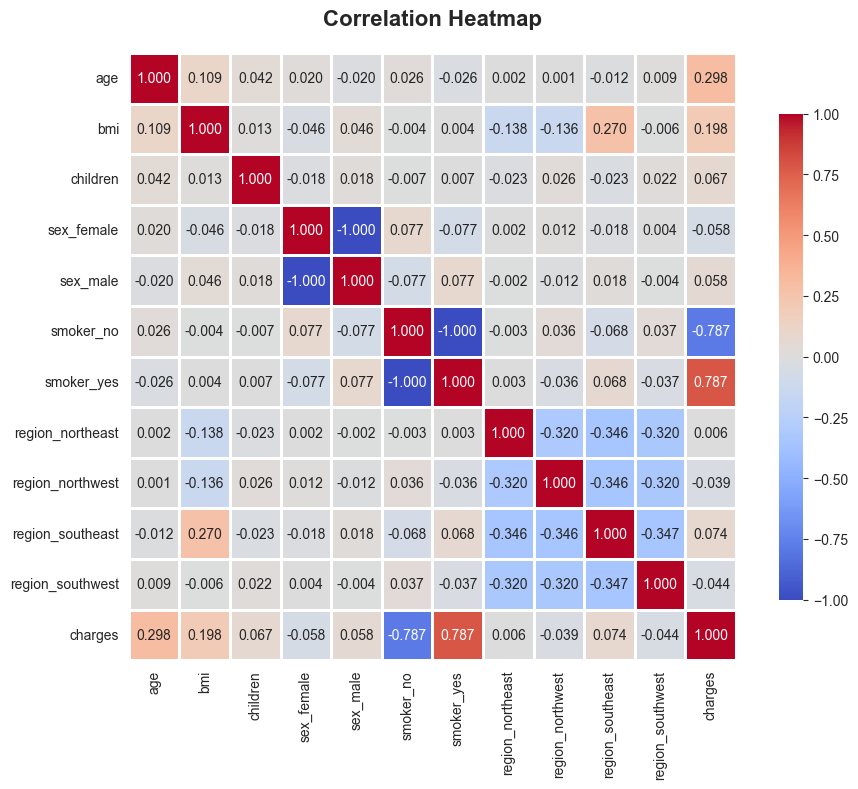

In [23]:
# Calculate correlation matrix
correlation_matrix = df_reg.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()